## **SCORING - Vitamin E: Workflow5**
#### **Micha Birklbauer 2021-08-02**

In [1]:
import os
from shutil import copyfile
copyfile("../../../scripts/python/scoring.py", "scoring.py")

'scoring.py'

In [2]:
import pandas as pd
from scoring import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Hydrophobic_Interaction:LYS73B,Hydrogen_Bond:SER14B,Hydrophobic_Interaction:HIS17B,Hydrogen_Bond:ARG143B,Hydrogen_Bond:HIS160B,Hydrophobic_Interaction:VAL175B,Hydrogen_Bond:ARG101B,Hydrophobic_Interaction:ASP162B,...,Hydrogen_Bond:ASP156B,Salt_Bridge:LYS161B,Hydrophobic_Interaction:ARG143B,Pi-Cation_Interaction:ARG101B,Hydrophobic_Interaction:ARG101B,Salt_Bridge:LYS140B,Hydrophobic_Interaction:ALA157B,Hydrogen_Bond:LYS161B,Hydrophobic_Interaction:ASP166B,LABEL
0,1,28|VitaminE_allmin_active|sdf|28,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,active
1,2,169|VitaminE_allmin_decoy|sdf|169,0,0,0,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,inactive
2,3,19|VitaminE_allmin_active|sdf|19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
3,4,37|VitaminE_allmin_active|sdf|37,0,0,0,1,0,0,2,1,...,1,0,0,0,0,0,0,0,0,active
4,5,124|VitaminE_allmin_active|sdf|124,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,8|VitaminE_allmin_active|sdf|8,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,active
85,86,14|VitaminE_allmin_active|sdf|14,0,0,0,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,active
86,87,55|VitaminE_allmin_decoy|sdf|55,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
87,88,130|VitaminE_allmin_active|sdf|130,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(89, 114) 63


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(23, 114) 15


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(29, 114) 19


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Salt_Bridge:ARG101B,0.151404,0.079365,0.230769
1,2,Hydrophobic_Interaction:LYS161B,0.148962,0.158730,0.307692
2,3,Hydrophobic_Interaction:VAL107B,0.145910,0.507937,0.653846
3,4,Hydrogen_Bond:GLN141B,0.133089,0.174603,0.307692
4,5,Hydrogen_Bond:LYS158B,0.126984,0.126984,0.000000
...,...,...,...,...,...
106,107,Hydrophobic_Interaction:TYR100B,0.006716,0.031746,0.038462
107,108,Pi-Cation_Interaction:ARG165B,0.006716,0.031746,0.038462
108,109,Pi-Stacking:TRP102B,0.006716,0.031746,0.038462
109,110,Hydrophobic_Interaction:THR137B,0.006716,0.031746,0.038462


#### **Extract relevant features:**

In [10]:
features_filtered = get_relevant_features(features)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
1,2,Hydrophobic_Interaction:LYS161B,0.148962,0.158730,0.307692
2,3,Hydrophobic_Interaction:VAL107B,0.145910,0.507937,0.653846
3,4,Hydrogen_Bond:GLN141B,0.133089,0.174603,0.307692
6,7,Hydrogen_Bond:THR137B,0.121490,0.301587,0.423077
8,9,Hydrogen_Bond:ASP162B,0.109280,0.301587,0.192308
10,11,Hydrophobic_Interaction:ARG138B,0.103785,0.126984,0.230769
14,15,Hydrogen_Bond:ASP166B,0.092186,0.253968,0.346154
22,23,Hydrophobic_Interaction:ARG165B,0.064713,0.603175,0.538462
23,24,Hydrogen_Bond:ARG165B,0.064103,0.333333,0.269231
25,26,Hydrogen_Bond:ARG101B,0.059829,0.555556,0.615385


In [11]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [12]:
positives, negatives = get_feature_impact(features_filtered)

In [13]:
positives

['Hydrogen_Bond:ASP162B',
 'Hydrophobic_Interaction:ARG165B',
 'Hydrogen_Bond:ARG165B',
 'Hydrogen_Bond:ARG138B']

In [14]:
negatives

['Hydrophobic_Interaction:LYS161B',
 'Hydrophobic_Interaction:VAL107B',
 'Hydrogen_Bond:GLN141B',
 'Hydrogen_Bond:THR137B',
 'Hydrophobic_Interaction:ARG138B',
 'Hydrogen_Bond:ASP166B',
 'Hydrogen_Bond:ARG101B',
 'Hydrophobic_Interaction:TYR142B']

#### **Score Compounds with different strategies & save results:**

In [15]:
# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
# train_result_strat1_sorted.to_csv("train_scores1.csv")
# train_result_strat2_sorted.to_csv("train_scores2.csv")
# train_result_strat3_sorted.to_csv("train_scores3.csv")
# train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [16]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [0, 0.7078651685393258] 
Strategy 2:  [0, 0.7078651685393258] 
Strategy 3:  [-3, 0.7078651685393258] 
Strategy 4:  [-3, 0.7415730337078652]


*accuracy for best cutoff:*

In [17]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 0, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 0, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), -3, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), -3, "accuracy")
)

Strategy 1:  0.7078651685393258 
Strategy 2:  0.7078651685393258 
Strategy 3:  0.7078651685393258 
Strategy 4:  0.7415730337078652


*false positive rate for best cutoff:*

In [18]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 0, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 0, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), -3, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), -3, "fpr")
)

Strategy 1:  1.0 
Strategy 2:  1.0 
Strategy 3:  0.9615384615384616 
Strategy 4:  0.8076923076923077


#### **Calculate validation and test results:**

In [19]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [20]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [21]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 0, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 0, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, -3, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, -3, pretty_print = True)
)

Strategy 1:  {'ACC': 0.7078651685393258, 'FPR': 1.0, 'AUC': 0.5421245421245421, 'Ya': 0.7078651685393258, 'EF': 1.0, 'REF': 100.0} 
Strategy 2:  {'ACC': 0.7078651685393258, 'FPR': 1.0, 'AUC': 0.5833333333333334, 'Ya': 0.7078651685393258, 'EF': 1.0, 'REF': 100.0} 
Strategy 3:  {'ACC': 0.7078651685393258, 'FPR': 0.9615384615384616, 'AUC': 0.6639194139194139, 'Ya': 0.7126436781609196, 'EF': 1.0067505929574896, 'REF': 98.41269841269842} 
Strategy 4:  {'ACC': 0.7415730337078652, 'FPR': 0.8076923076923077, 'AUC': 0.6916971916971918, 'Ya': 0.7439024390243902, 'EF': 1.050909794812234, 'REF': 96.82539682539682}


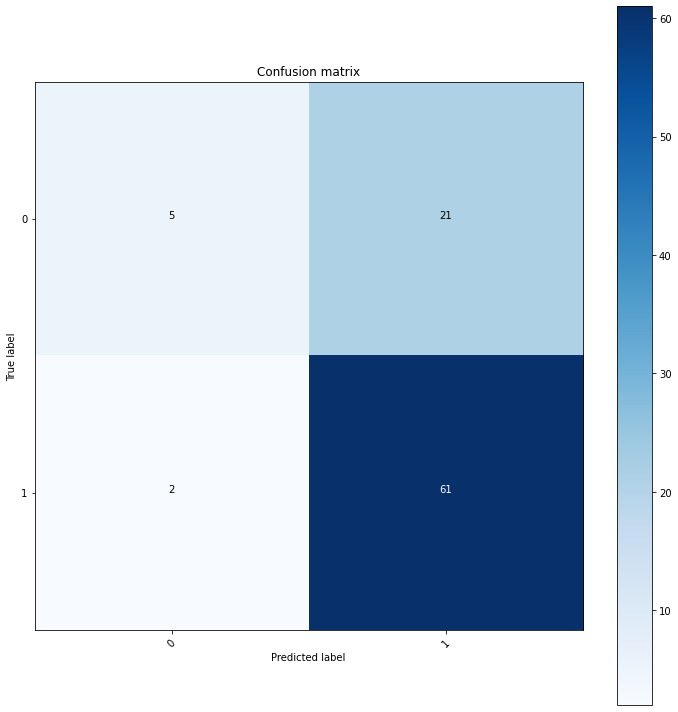

In [22]:
plot_confusion_matrix(get_metrics(train_result_strat4, -3)["CM"], classes = [0, 1], filename = "results/CM_train_strat4.png");

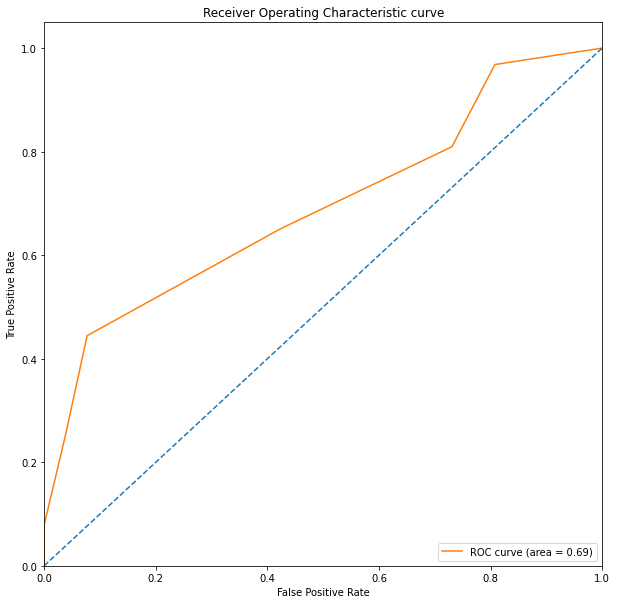

In [23]:
roc = get_metrics(train_result_strat4, -3)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat4.png");

*validation data:*

In [24]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 0, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 0, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, -3, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, -3, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6521739130434783, 'FPR': 1.0, 'AUC': 0.48333333333333334, 'Ya': 0.6521739130434783, 'EF': 1.0, 'REF': 100.0} 
Strategy 2:  {'ACC': 0.6521739130434783, 'FPR': 1.0, 'AUC': 0.5041666666666667, 'Ya': 0.6521739130434783, 'EF': 1.0, 'REF': 100.0} 
Strategy 3:  {'ACC': 0.6086956521739131, 'FPR': 1.0, 'AUC': 0.6375, 'Ya': 0.6363636363636364, 'EF': 0.9757575757575757, 'REF': 93.33333333333333} 
Strategy 4:  {'ACC': 0.6086956521739131, 'FPR': 1.0, 'AUC': 0.5958333333333333, 'Ya': 0.6363636363636364, 'EF': 0.9757575757575757, 'REF': 93.33333333333333}


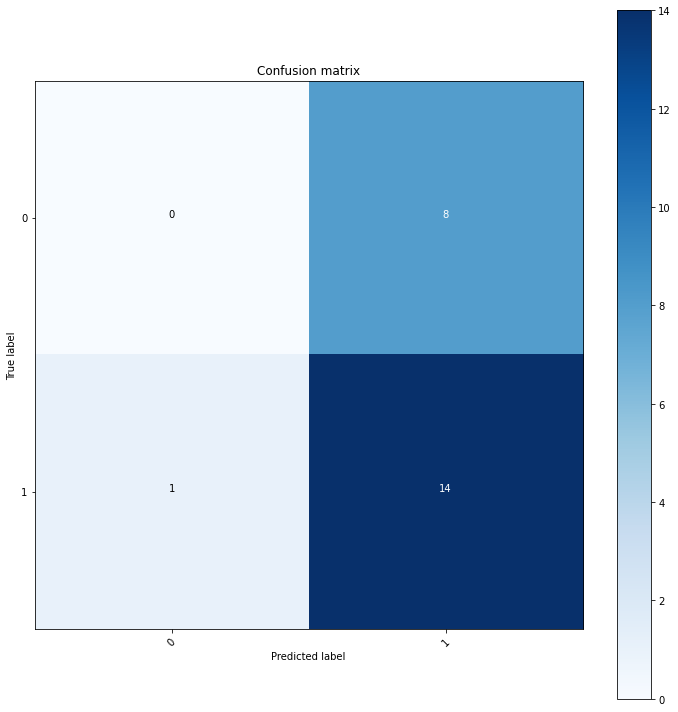

In [25]:
plot_confusion_matrix(get_metrics(val_result_strat4, -3)["CM"], classes = [0, 1], filename = "results/CM_val_strat4.png");

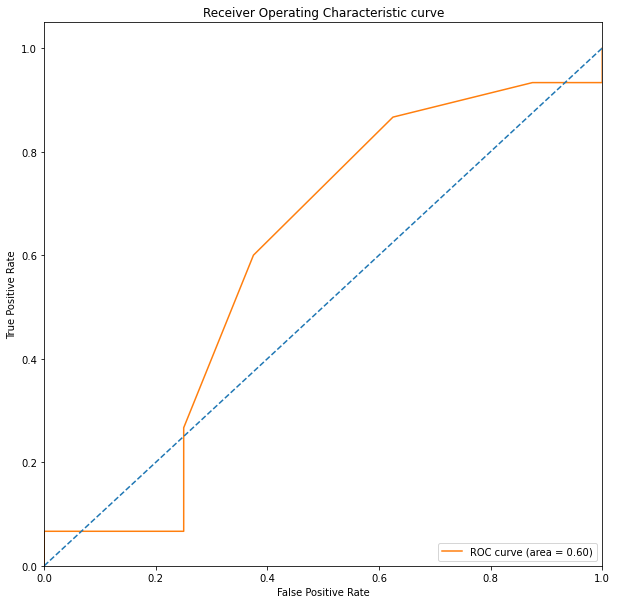

In [26]:
roc = get_metrics(val_result_strat4, -3)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat4.png");

*test data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 0, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 0, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, -3, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, -3, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6551724137931034, 'FPR': 1.0, 'AUC': 0.5631578947368421, 'Ya': 0.6551724137931034, 'EF': 1.0, 'REF': 100.0} 
Strategy 2:  {'ACC': 0.6551724137931034, 'FPR': 1.0, 'AUC': 0.5684210526315789, 'Ya': 0.6551724137931034, 'EF': 1.0, 'REF': 100.0} 
Strategy 3:  {'ACC': 0.6206896551724138, 'FPR': 1.0, 'AUC': 0.5473684210526315, 'Ya': 0.6428571428571429, 'EF': 0.9812030075187971, 'REF': 94.73684210526316} 
Strategy 4:  {'ACC': 0.6206896551724138, 'FPR': 1.0, 'AUC': 0.5421052631578946, 'Ya': 0.6428571428571429, 'EF': 0.9812030075187971, 'REF': 94.73684210526316}


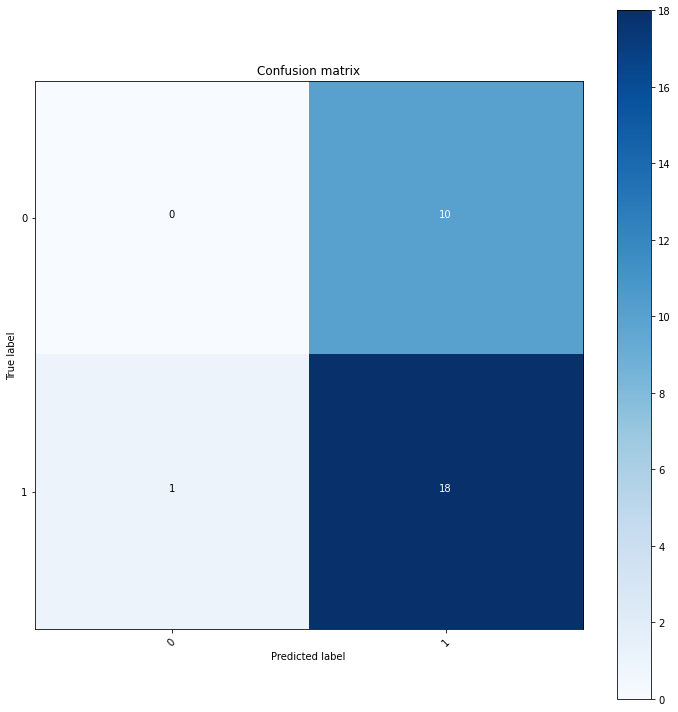

In [28]:
plot_confusion_matrix(get_metrics(test_result_strat4, -3)["CM"], classes = [0, 1], filename = "results/CM_test_strat4.png");

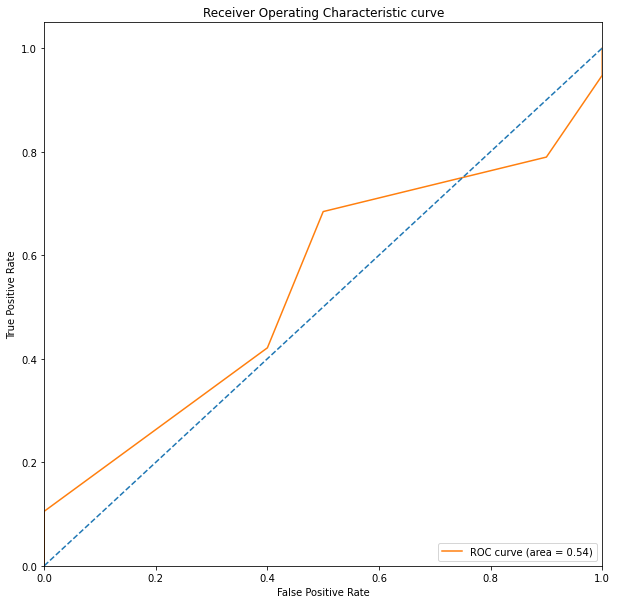

In [29]:
roc = get_metrics(test_result_strat4, -3)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat4.png");

#### **Clean up:**

In [30]:
os.remove("scoring.py")